In [1]:
import pandas as pd
import numpy as np
data = np.load('wp.npz')
textwp = str(data['text'])

In [2]:
#Create Uni-gram dict of probability of each letter occuring

#include space at the start
list_of_letters = " abcdefghijklmnopqrstuvwxyz"

unigram_dict = {}

for i in list_of_letters:
    count = 0
    for j in textwp:
        if i == j:
            count += 1
    
    unigram_dict[i] = count / len(textwp)
    
unigram_dict

{' ': 0.18021439137694942,
 'a': 0.06293188850329143,
 'b': 0.010718958080628553,
 'c': 0.018966448134290527,
 'd': 0.036980405378168504,
 'e': 0.09673813860254103,
 'f': 0.017126513022159843,
 'g': 0.01571075548193779,
 'h': 0.051310827796731906,
 'i': 0.053498594625496096,
 'j': 0.0007866676927549616,
 'k': 0.006391369620212962,
 'l': 0.029706477670975017,
 'm': 0.018913922185861236,
 'n': 0.05678116101890568,
 'o': 0.05869530430236379,
 'p': 0.013996027572458325,
 'q': 0.0007158187390596389,
 'r': 0.04566795294163634,
 's': 0.05020350751182139,
 't': 0.06940662779746483,
 'u': 0.019933902812337003,
 'v': 0.008343991214729741,
 'w': 0.018255820913389596,
 'x': 0.001257874311513077,
 'y': 0.014164904604326917,
 'z': 0.0007472732314329933}

## When trying to use dataframe:

In [3]:
# #Create bi-gram dataframe of every possible combination of letters (27 x 27)

# #2D array to hold counts for each letter
# bigram_array = []

# #loop through every letter twice (to get every combination)
# for i in list_of_letters:
#     #declare empty counter for current letter
#     current_letter_count = []
    
#     for j in list_of_letters:
#         #append how many times letter1 + letter2 appears in text together
#         current_letter_count.append(textwp.count(i+j) + 1)
        
#     #append array of length 27 to 2D array
#     bigram_array.append(current_letter_count)
            

# #create bi-gram dict
# d = {element: bigram_array[index] for index, element in enumerate(list_of_letters)}
# #convert to DataFrame
# bigram_df = pd.DataFrame(data = d)
# bigram_df = bigram_df.rename(index={i: list_of_letters[i] for i in range(len(list_of_letters))})

# bigram_df

### Bigram dictionary

In [4]:
#create bi-gram dict for every combination of letters

bigram_dict = {}

for i in list_of_letters:
    for j in list_of_letters:
        current_letter_count = (textwp.count(i+j) + 1)
        bigram_dict[i+j] = current_letter_count
        
len(bigram_dict)

729

### setting up functions to decipher a phrase

In [5]:
#generate a random solution key where every letter maps to another randomly generated letter
import random

sol_key = list(list_of_letters)
random.shuffle(sol_key)
sol_key = ''.join(sol_key)
print('solution_key: ', sol_key)

solution_key:  don rugbtijkcmqpaxwfyzvhels


In [6]:
#jumbled phrase

jumbled = "zywd ynf zmbb oanx jr xia imbb xp gaxwi y rymb pg oyxal"

#first, convert with Uni-gram decoding

def unigram_decode(jumbled_phrase, unigram_probability_dictionary):
    
    #get probabilities of current letters in phrase
    phrase_unigram_dict = {}

    for i in list_of_letters:
        count = 0
        for j in jumbled_phrase:
            if i == j:
                count += 1

        phrase_unigram_dict[i] = count / len(jumbled_phrase)

    #now, replace letters according to their probabilities
    
    #sort dictionaries by probability & convert back to dict
    
    unigram_probability_dictionary = dict(sorted(unigram_probability_dictionary.items(), 
                                            key=lambda x:x[1], reverse = True))
    
    phrase_unigram_dict = dict(sorted(phrase_unigram_dict.items(), 
                                            key=lambda x:x[1], reverse = True))
    
    #find the letters that correspond with one another
    
    wnp_sorted_dict_probability = list(unigram_probability_dictionary.keys())
    phrase_sorted_dict_probability = list(phrase_unigram_dict.keys())
    
    unigram_replacement = {phrase_sorted_dict_probability[i]: wnp_sorted_dict_probability[i]
                          for i in range(len(wnp_sorted_dict_probability))}
    
    #replace letters
    
    unigram_decoded = ""
    
    for i in jumbled_phrase:
        unigram_decoded += unigram_replacement[i]
        
        
    #return decryption key
    
    #sort dict by alphabetical order
    unigram_replacement = dict(sorted(unigram_replacement.items(), 
                                            key=lambda x:x[0]))
    
    sol_key = []
    for i in unigram_replacement:
        sol_key.append(unigram_replacement[i])
        
    sol_key = ''.join(sol_key)
    
    #return current phrase + current solution key
    
    return unigram_decoded, sol_key
    
current_jumbled, unigram_sol_key = unigram_decode(jumbled, unigram_dict)

print('current jumbled phrase: ', current_jumbled)
print('current solution key: ', unigram_sol_key)

current jumbled phrase:  caum asw ciee rost fl tno niee td hotun a laie dh ratog
current solution key:   oeympwhbnfvgisrdklxjzqutac


Now the spaces are properly mapped to eachother. While this is a better starting point (e.g., the a is properly mapped), we still need bi-gram decoding

In [7]:
#define function to 'un-jumble' phrase given a solution key:

def unJumble(jumbled_phrase, solution_key):
    
    decrypt_dict = {list_of_letters[i]: solution_key[i]
                          for i in range(len(solution_key))}
    unjumbled = []
    
    for i in jumbled_phrase:
        unjumbled.append(decrypt_dict[i])
        
    unjumbled = ''.join(unjumbled)
    
    return unjumbled

unJumble(jumbled, unigram_sol_key)

'caum asw ciee rost fl tno niee td hotun a laie dh ratog'

### When trying to use dataframe and scoring function from Equation 2

In [8]:
# #define function to score a given un-jumbled phrase

# def score_sol_key(jumbled_phrase, solution_key):
    
#     #first, unjumble phrase given key
#     unjumbled_phrase = unJumble(jumbled_phrase, solution_key)
    
#     #use equation 2 from http://probability.ca/jeff/ftpdir/decipherart.pdf
    
#     pi = []
    
#     #added epsilon << 1 to avoid divide by 0 error
#     epsilon = 0.001
    
#     for i in list_of_letters:
#         for j in list_of_letters:
            
#             f_beta = unjumbled_phrase.count(i+j) + epsilon
#             r_beta = bigram_df[i][j] + epsilon
            
#             pi.append(r_beta**f_beta)
                
   
#     score = np.prod(pi) 
            
#     return score, unjumbled_phrase
    

In [9]:
#function to return dict of letters in any given text

def turn_to_dict(text):
    turn_dict = {}
    for i in range(len(text)-1):
        key = text[i] + text[i+1]
        if key in turn_dict:
            turn_dict[key] += 1
        else:
            turn_dict[key] = 1
        
    return turn_dict

In [10]:
def score_sol_key(jumbled_phrase, solution_key):
    
    #first, unjumble phrase given key
    unjumbled_phrase = unJumble(jumbled_phrase, solution_key)

    unjumbled_dict = turn_to_dict(unjumbled_phrase)
    score = 0
    
    for key, value in unjumbled_dict.items():
        score += value * math.log(bigram_dict[key])
        
    return score, unjumbled_phrase

In [11]:
#swap indices at random in sol key
import random

def swap_indices(sol_key, first_index, second_index):
    #convert to list so we can support item assignment
    sol_key = list(sol_key)
    
    l1_temp = sol_key[first_index]
    
    sol_key[first_index] = sol_key[second_index]
    sol_key[second_index] = l1_temp
    
    #return back to string
    sol_key = ''.join(sol_key)
    
    return sol_key

In [12]:
#function to test whether or not to swap solutions
import math

def should_swap(current_score, proposed_score):
    #define acceptance probability
    
#     acceptance_probability = min(1, proposed_score/current_score)
    acceptance_probability = min(1,math.exp(proposed_score-(current_score)))
    U = random.uniform(0,1)
    
    if U < acceptance_probability:
        return True
    else:
        return False


### First Decipher attempt

In [13]:
#define code breaking function

def decipher(jumbled_phrase, solution_key, n_iterations):
    
    current_sol_key = solution_key
    
    #keep array of scores and phrases
    score_array = []
    phrase_array = []
    
    #evaluate current score
    current_score, current_phrase = score_sol_key(jumbled_phrase, current_sol_key)
    
    #loop through number of iterations
    for i in range(n_iterations):
        
         #do not swap index 0 (space) as it will almost always be correctly mapped
        first_index =  random.randint(1, len(solution_key)-1)
        second_index =  random.randint(1, len(solution_key)-1)
        
        #propose new solution key
        proposed_sol = swap_indices(current_sol_key, first_index, second_index)
        #calculate score with proposed solution
        proposed_score, proposed_phrase = score_sol_key(jumbled_phrase, proposed_sol)
            
        #check acceptance probability
        if should_swap(current_score, proposed_score):
            #save variables before they are overwritten
            score_array.append(current_score)
            phrase_array.append(current_phrase)
            
            #swap to proposed phrase and score
            current_score = proposed_score
            current_sol_key = proposed_sol
            current_phrase = proposed_phrase
        
        #print out a log of the phrases as the iterations progress
        if i%10000 == 0:
            print(i, current_phrase, current_score, proposed_score)
        

    return score_array, phrase_array

In [14]:
score_a, phrase_a = decipher(jumbled, unigram_sol_key, 200000)

0 caum asw ciee rost fl tno niee td hotun a laie dh ratog 500.0537722820202 477.85281725752753
10000 pard afy piss beft un the hiss to metrh a nais om batel 518.835779013305 516.7457563163629
20000 wary and wiss ment ch tle liss to fetrl a hais of matev 533.3015098431638 533.3015098431638
30000 pacy ang piss mont lw tho hiss te dotch a wais ed matou 527.1198052386588 504.8006479054069
40000 wacy and wiss ment lp the hiss to retch a pais or matex 530.0924796494428 457.69776137336993
50000 waly ang wiss hent up tre riss to detlr a pais od hatev 530.7962214807012 524.5899936372657
60000 laug and liss hent my tre riss to fetur a yais of hatew 530.8102400861566 520.0060147316465
70000 waud asm winn hest gl tre rinn to fetur a lain of hateq 522.5859525935507 473.0102545961271
80000 waug and wiss cent br the hiss to fetuh a rais of catev 530.2953844268748 519.4939173723385
90000 palf and pree mont by tio iree th sotli a yare hs matov 526.4674762664318 519.77553029886
100000 wacu ang wiss bont

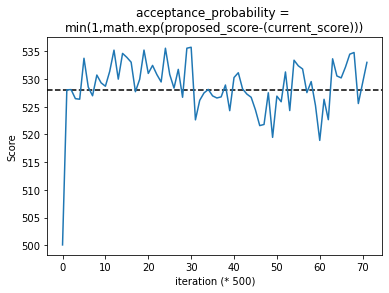

In [15]:
import matplotlib.pyplot as plt
plt.axhline(528,0,100, linestyle = '--', c = 'k')
plt.plot(score_a[::500])
plt.xlabel('iteration (* 500)')
plt.ylabel('Score')
plt.title('acceptance_probability = \nmin(1,math.exp(proposed_score-(current_score)))')

plt.show()

In [16]:
#return best score
def best_score(phrase_array):
    original = 'jack and jill went up the hill to fetch a pail of water'
    
    correct_percentages = []
    best_percentage = 0

    for i in phrase_array:

        letters_correct = sum(x == y for x, y in zip(original, i))

        percent_correct = letters_correct / len(i)

        correct_percentages.append(percent_correct)

        #find best phrase

        if percent_correct > best_percentage:
            best_percentage = percent_correct
            best_phrase = i

    print(best_phrase, round(best_percentage,2), '%')

In [17]:
best_score(phrase_a)

rack and riss went up the hiss to fetch a pais of watem 0.85 %


### Decipher using only positive proposals

In [18]:
# what if we accept only positive proposals?


def decipher_only_pos(jumbled_phrase, solution_key, n_iterations):
    
    current_sol_key = solution_key
    
    #keep array of scores and phrases
    score_array = []
    phrase_array = []
    
    #evaluate current score
    current_score, current_phrase = score_sol_key(jumbled_phrase, current_sol_key)
    
    #loop through number of iterations
    for i in range(n_iterations):
        
         #do not swap index 0 (space) as it will almost always be correctly mapped
        first_index =  random.randint(1, len(solution_key)-1)
        second_index =  random.randint(1, len(solution_key)-1)
        
        #propose new solution key
        proposed_sol = swap_indices(current_sol_key, first_index, second_index)
        #calculate score with proposed solution
        proposed_score, proposed_phrase = score_sol_key(jumbled_phrase, proposed_sol)
            
        #check acceptance probability
        if proposed_score > current_score:
            #save variables before they are overwritten
            score_array.append(current_score)
            phrase_array.append(current_phrase)
            
            #swap to proposed phrase and score
            current_score = proposed_score
            current_sol_key = proposed_sol
            current_phrase = proposed_phrase
        
        #print out a log of the phrases as the iterations progress
        if i%10000 == 0:
            print(i, current_phrase, current_score, proposed_score)
        

    return score_array, phrase_array 

In [19]:
score_a, phrase_a = decipher_only_pos(jumbled, unigram_sol_key, 200000)

0 caum asw ciee rost fl tno niee td hotun a laie dh ratog 500.0537722820202 466.9922872409625
10000 laug any ldee wint sh tri rdee to fitur a hade of watim 528.0567085221538 521.8875529934088
20000 laug any ldee wint sh tri rdee to fitur a hade of watim 528.0567085221538 524.5479927616117
30000 laug any ldee wint sh tri rdee to fitur a hade of watim 528.0567085221538 516.3926916695692
40000 laug any ldee wint sh tri rdee to fitur a hade of watim 528.0567085221538 528.0567085221538
50000 laug any ldee wint sh tri rdee to fitur a hade of watim 528.0567085221538 525.9076204013791
60000 laug any ldee wint sh tri rdee to fitur a hade of watim 528.0567085221538 498.7370575639818
70000 laug any ldee wint sh tri rdee to fitur a hade of watim 528.0567085221538 528.0567085221538
80000 laug any ldee wint sh tri rdee to fitur a hade of watim 528.0567085221538 509.1707716883694
90000 laug any ldee wint sh tri rdee to fitur a hade of watim 528.0567085221538 505.62058496611917
100000 laug any ldee wi

In [20]:
best_score(phrase_a)

caum asw ciee rost fl tho hiee td notuh a laie dn ratog 0.51 %


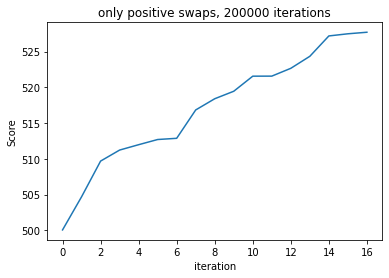

In [21]:
import matplotlib.pyplot as plt
plt.plot(score_a)
plt.xlabel('iteration')
plt.ylabel('Score')
plt.title('only positive swaps, 200000 iterations')

plt.show()

### Decipher with iteration dependant swap

In [22]:
#what if we reduce the probability of swapping sol_keys as the iterations increase?

def should_swap_iteration_dep(current_score, proposed_score, n_iterations, current_iteration):
    #define acceptance probability
    acceptance_probability = min(1,math.exp(proposed_score-(current_score)))
    U = random.uniform(0,1)
    
    #percent of iterations completed
    percent_iter = current_iteration/n_iterations
    
    if (U + (percent_iter/4)) < acceptance_probability:
        return True
    else:
        return False



def decipher_diminishing_iterations(jumbled_phrase, solution_key, n_iterations):
    
    current_sol_key = solution_key
    
    #keep array of scores and phrases
    score_array = []
    phrase_array = []
    
    #evaluate current score
    current_score, current_phrase = score_sol_key(jumbled_phrase, current_sol_key)
    
    #loop through number of iterations
    for i in range(n_iterations):
        
         #do not swap index 0 (space) as it will almost always be correctly mapped
        first_index =  random.randint(1, len(solution_key)-1)
        second_index =  random.randint(1, len(solution_key)-1)
        
        #propose new solution key
        proposed_sol = swap_indices(current_sol_key, first_index, second_index)
        #calculate score with proposed solution
        proposed_score, proposed_phrase = score_sol_key(jumbled_phrase, proposed_sol)
            
        #check acceptance probability
        if should_swap_iteration_dep(current_score, proposed_score, n_iterations, i):
            #save variables before they are overwritten
            score_array.append(current_score)
            phrase_array.append(current_phrase)
            
            #swap to proposed phrase and score
            current_score = proposed_score
            current_sol_key = proposed_sol
            current_phrase = proposed_phrase
        
        #print out a log of the phrases as the iterations progress
        if i%30000 == 0:
            print(i, current_phrase, current_score, proposed_score)
        
            
    return score_array, phrase_array 

In [23]:
score_a, phrase_a = decipher_diminishing_iterations(jumbled, unigram_sol_key, 400000)

0 caum ask ciee rost fl tno niee td hotun a laie dh ratog 500.7909243777664 500.7909243777664
30000 paly ang pree wint ch toi oree td sitlo a hare ds watim 535.3747752717047 499.5381846348688
60000 waug and wiss hent pl tre riss to fetur a lais of hatev 535.2430066134064 523.3083604995197
90000 pacy and piss went lf the hiss to metch a fais om water 532.7141988695495 517.5174406842224
120000 wacu ang wiss pent ld the hiss to retch a dais or patem 533.0593856338486 533.0593856338486
150000 wacu and wiss rent pl the hiss to fetch a lais of ratex 532.1203927417564 510.4217557038313
180000 waly ang wiss bent ch tde diss to metld a hais om bater 534.5555213909629 529.4572935167012
210000 wacu and wiss ment bl the hiss to retch a lais or matex 534.1956704829665 530.8210509504158
240000 wack and wiss ment pl the hiss to retch a lais or matef 534.8372694616604 532.0205854195555
270000 wacy ang wiss ment pl the hiss to retch a lais or mated 535.1264836326486 535.1264836326486
300000 wack and wi

In [24]:
best_score(phrase_a)

mack and miss went up the hiss to letch a pais ol water 0.84 %


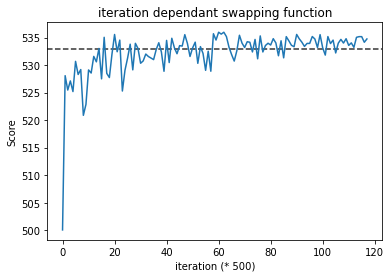

In [25]:
import matplotlib.pyplot as plt
plt.axhline(533,0,100, linestyle = '--', c = 'k', alpha = 0.8)
plt.plot(score_a[::500])
plt.xlabel('iteration (* 500)')
plt.ylabel('Score')
plt.title('iteration dependant swapping function')

plt.show()

### Decipher by comparing to english dictionary + all other methods

In [26]:
#what if we try comparing the words in the unjumbled phrase to words in the dictionary?

#import list of 10,000 words
with open('10000_words.txt') as f:
    word_list = []
    for row in f:
        word_list.append(row.rstrip('\n'))

#seperate by space

def sep_words(phrase):
    words = phrase.split()
    return words

#calculate score, weighted by how many words are in English Language

def word_score(phrase):
    words = sep_words(phrase)
    
    #return how many times a word appears in dictionary
    intersection = list(set(words).intersection(word_list))
    times_appears = len(intersection)
    
    return times_appears


def score_sol_key_with_dictionary(jumbled_phrase, solution_key):
    
    #first, unjumble phrase given key
    unjumbled_phrase = unJumble(jumbled_phrase, solution_key)

    unjumbled_dict = turn_to_dict(unjumbled_phrase)
    score = 0
    
    for key, value in unjumbled_dict.items():
        score += value * math.log(bigram_dict[key])
        
    #multiply by # of words that appear in dictionary
    score *= (word_score(unjumbled_phrase) / len(unjumbled_phrase))
        
    return score, unjumbled_phrase

#define code breaking function

def decipher_with_dict(jumbled_phrase, solution_key, n_iterations):
    
    current_sol_key = solution_key
    
    #keep array of scores and phrases
    score_array = []
    phrase_array = []
    
    #evaluate current score
    current_score, current_phrase = score_sol_key_with_dictionary(jumbled_phrase, current_sol_key)
    
    #loop through number of iterations
    for i in range(n_iterations):
        
         #do not swap index 0 (space) as it will almost always be correctly mapped
        first_index =  random.randint(1, len(solution_key)-1)
        second_index =  random.randint(1, len(solution_key)-1)
        
        #propose new solution key
        proposed_sol = swap_indices(current_sol_key, first_index, second_index)
        #calculate score with proposed solution
        proposed_score, proposed_phrase = score_sol_key_with_dictionary(jumbled_phrase, proposed_sol)
            
        #check acceptance probability
        if should_swap_iteration_dep(current_score, proposed_score, n_iterations, i):
            #save variables before they are overwritten
            score_array.append(current_score)
            phrase_array.append(current_phrase)
            
            #swap to proposed phrase and score
            current_score = proposed_score
            current_sol_key = proposed_sol
            current_phrase = proposed_phrase
        
#         #print out a log of the phrases as the iterations progress
#         if i%10000 == 0:
#             print(i, current_phrase, current_score)
        
    return score_array, phrase_array


In [27]:
score_vary = []
phrase_vary = []
iteration_vary = []

for i in np.linspace(100000,400000, 10):
    
    score, phrase = decipher_with_dict(jumbled, unigram_sol_key, int(i))
    
    score_vary.append(score)
    phrase_vary.append(phrase)
    iteration_vary.append(int(i))


In [28]:
#return best score for 2D array
def best_score_2d(phrase_array):
    original = 'jack and jill went up the hill to fetch a pail of water'
    
    correct_percentages = []
    best_percentage = 0

    for i in phrase_array:
        for j in i:

            letters_correct = sum(x == y for x, y in zip(original, j))

            percent_correct = letters_correct / len(j)

            correct_percentages.append(percent_correct)

            #find best phrase

            if percent_correct > best_percentage:
                best_percentage = percent_correct
                best_phrase = j

    print(best_phrase, round(best_percentage,2), '%')

### In the end, the closest I was able to get was:

In [29]:
best_score_2d(phrase_vary)

jack and jill rent um the hill to fetch a mail of rates 0.91 %


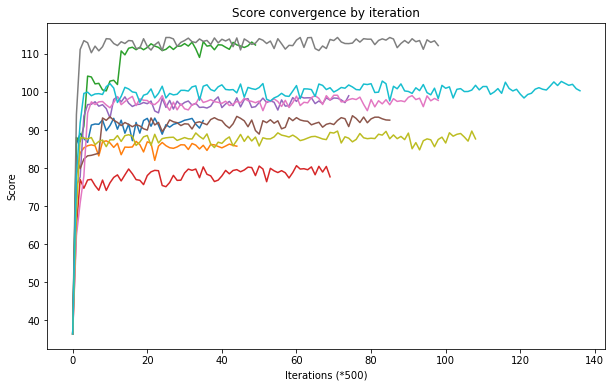

In [58]:
plt.rcParams['figure.figsize'] = (10,6)

for i in range(len(phrase_vary)):
    plt.plot(score_vary[i][::500])

plt.xlabel('Iterations (*500)')
plt.ylabel('Score')
plt.title('Score convergence by iteration')
plt.show()

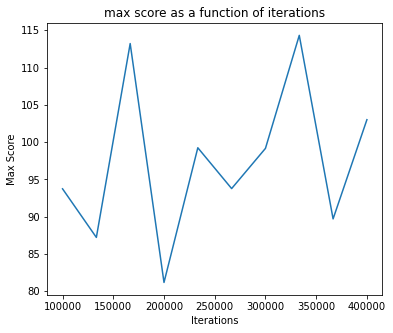

In [53]:
#MAX score by iteration
plt.rcParams['figure.figsize'] = (6,5)
max_scores = []
for i in range(len(score_vary)):
    max_scores.append(max(score_vary[i]))
    
plt.plot(iteration_vary, max_scores)
plt.xlabel('Iterations')
plt.ylabel('Max Score')
plt.title('max score as a function of iterations')
plt.show()

calculate the percentage of correct letters in your solution phrase (at the right position) compared to the true phrase. How does this compare to if you were to randomly draw a
letter for each position?

In [34]:

#if randomly drawing a letter for each position,

random_solution = []
original = 'jack and jill went up the hill to fetch a pail of water'
for i in range(len(original)):
    random_index = random.randint(0, len(list_of_letters)-1)
    random_solution.append(list_of_letters[random_index])
    
random_solution = ''.join(random_solution)

letters_correct_random = sum(x == y for x, y in zip(random_solution, original))

percent_correct_random = letters_correct_random / len(original)

print('\npercentage solved IF RANDOM: ', round(percent_correct_random,2), '%')


percentage solved IF RANDOM:  0.05 %
